# Uniparametric models

Consider a random variable $Y$, whose likelihood, when it takes the value $y$ and the parameters $\theta$ take the value $t$, is given by

$$p_{Y|\theta}(y|t).$$

For example, if $Y$ is variable with a normal distribution with mean $\theta$ and unit variance, then

$$p_{Y|\theta}(y|t)=\frac{1}{\sqrt{2\pi}}\exp\left\lbrace-\frac{(y-t)^2}{2}\right\rbrace 1_{y\in\mathbb{R}}.$$

In the Bayesian argot, it is usual to to make use of abused of notations, sometimes even dangerous, for example

$$p_{Y|\theta}(y|t)$$

would be written as

$$p(Y|\theta).$$

## Notation

Before moving forward, it is good to introduce at this point the notation that we are going to use throughout this book. However, sooner than later, we are going to follow the abuse of notation usual in the field of Bayesian statistics.

- Random variables: $Y, \theta$.
- Sample space: $\mathcal{Y}$, $Y\in\mathcal{Y}$.
- Parametric space: $\Theta$, $\theta\in\Theta$.
- Random sample: $\mathbf{Y}=(Y_1,\ldots,Y_n)$.
- Observed sample: $\mathbf{y}=(y_1,\ldots,y_n)$.
- Prior distribution or *a priori*: $p(\theta)$.
- Likelihood: $p(Y|\theta)$.
- Likelihood of the sample: $p(\mathbf{Y}|\theta)$.
- Evidence: $p(\mathbf{Y})$.
- Posterior distribution or *a posteriori*: $p(\theta|\mathbf{Y})$.

## Posterior distribution

The prior distribution of probability is the distribution based on the previous information (expertise of specialists, historical data, etc.), prior to obtain new measurements. Then, we get new data (we obtain evidence) and combine this new information with the prior distribution using Bayes' rule to obtain the posterior distribution of probability:

$$p_{\theta|\mathbf{Y}}(t|\mathbf{y})=\frac{p_{\mathbf{Y}|\theta}(\mathbf{y}|t)p_\theta(t)}{p_\mathbf{Y}(\mathbf{y})}=\frac{p_{\mathbf{Y}|\theta}(\mathbf{y}|t)p_\theta(t)}{\int_\Theta p_{\mathbf{Y}|\theta}(\mathbf{y}|\tilde t)p_\theta(\tilde t)d\tilde t}$$

With the usual abuse of notation of Bayesian statistics, the previous result would be written as:

$$p(\theta|\mathbf{Y})=\frac{p(\mathbf{Y}|\theta)p(\theta)}{p(\mathbf{Y})}=\frac{p(\mathbf{Y}|\theta)p(\theta)}{\int_\Theta p(\mathbf{Y}|\tilde\theta)p(\tilde\theta)d\tilde\theta}$$

or, equivalentely:

$$p(\theta|\mathbf{Y})\propto p(\mathbf{Y}|\theta)p(\theta).$$

## Beta-Binomial

Asume that $Y_i|\theta\overset{iid}{\sim}\text{Bernoulli}(\theta)$ and the uncertainty about $\theta\in (0,1)$ is quantified through $\theta\sim\textsf{Beta}(\alpha, \beta)$. We get the observations $\mathbf{y}=(y_1,\ldots,y_n)$, then

$$p(\mathbf{Y}|\theta)=\theta^{\sum_{i=1}^n y_i}(1-\theta)^{n-\sum_{i=1}^n y_i}\prod_{i=1}^n1_{\{0,1\}}(y_i)$$

and

$$p(\theta)=B(\alpha,\beta)^{-1}\theta^{\alpha-1}(1-\theta)^{\beta-1}1_{(0,1)}(\theta).$$

Thus,

$$p(\theta|\mathbf{Y})\propto \theta^{\alpha+\sum_{i=1}^n y_i-1}(1-\theta)^{\beta+n-\sum_{i=1}^n y_i-1}1_{(0,1)}(\theta),$$

that is,

$$\theta|\mathbf{Y}\sim\textsf{Beta}\left(\alpha+\sum_{i=1}^n y_i, \beta+n-\sum_{i=1}^n y_i\right).$$

Remember that if $Y_1\ldots,Y_n|\theta\overset{iid}{\sim}\textsf{Bernoulli}(\theta)$, then

$$Z=\sum_{i=1}^n Y_i|\theta\sim\textsf{Binomial}(n,\theta).$$

Therefore, if

$$\theta\sim\textsf{Beta}(\alpha, \beta),$$

we conclude that

$$\theta|Z\sim\textsf{Beta}(\alpha+Z,\beta+n-Z).$$

### Example

Assume that $Y|\theta\sim\textsf{Bernoulli}(\theta)$ and that we don't have information about $\theta$ to prefer some value over another, so we model $\theta\sim\textsf{Beta}(1,1)$ (i.e. $\theta\sim\textsf{Uniform}(0,1)$). Then, we get a simple random sample (i.e. we obtain an iid sample) $\mathbf{y}=(1,0,1,1,1,0,1,0,1)$, or equivalently $z=6$ and $n=9$. Next figure shows the prior and posterior distributions.

```{image} Images/PriorPosteriorBetaBinomial.png
:alt: PriorPosteriorBetaBinomial
:align: center
```

## Principle of indifference 

Analyzing the binomial model, Laplace assumed the uniform distribution as prior arguing what he called the *principle of indifference*, also called *principle of insufficient reason*, which stablishes that the uniform assumption is appropriate when we have no information about $\theta$, that is

$$
\begin{aligned}
\theta & \sim \textsf{Beta}(1,1), \\
Y|\theta & \sim \textsf{Binomial}(n,\theta) \\
\Rightarrow \theta|Y & \sim \textsf{Beta}(Y+1, n-Y+1).
\end{aligned}
$$

### Proportion of girls' births

One of the first applications of this model made by Laplace was the estimation of the proportion of girls' births, $\theta$, in a population. Laplace knew that between 1745 and 1770, 241945 girls and 251527 boys were born in Paris, if $Y$ denotes the number of girls' births, then

$$\theta|Y\sim\textsf{Beta}(241946, 251528).$$

With this result, we can show that it is more probable that a boy is born than a girl, as it is shown in the next cell, which calculates $\mathbb{P}(\theta>0.5)$.

In [1]:
from scipy.stats import beta

fem_births = 241945
mal_births = 251527

beta.sf(0.5, fem_births+1, mal_births+1)

1.1460584901546728e-42

### Probability of a girl birth given placenta previa

Placenta previa is an unusual condition of pregnancy in which the placenta is implanted low in the uterus. An early study concerning the sex of placenta previa births in Germany found of a total of 980 births, 437 were female.

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.special import logit, expit

In [3]:
births = 987
fem_births = 437

Posterior mean

In [4]:
beta.mean(fem_births+1, births-fem_births+1).round(3)

0.443

Posterior interval

In [5]:
LowInterval = beta.mean(fem_births+1, births-fem_births+1) - 2 * beta.std(fem_births+1, births-fem_births+1)
UppInterval = beta.mean(fem_births+1, births-fem_births+1) + 2 * beta.std(fem_births+1, births-fem_births+1)

round(LowInterval,3), round(UppInterval,3)

(0.411, 0.474)

We can also simulate a sample from the posterior to make inferences

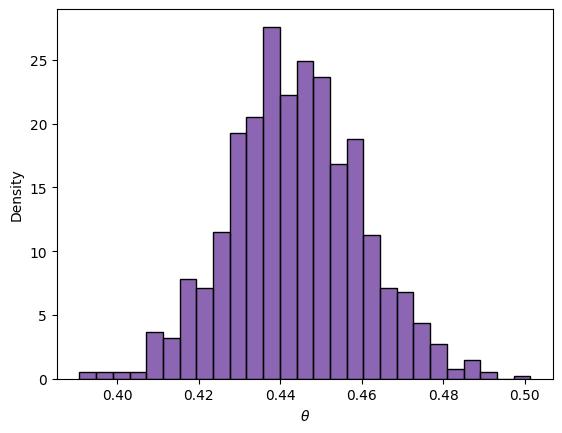

In [6]:
PosteriorSample = beta.rvs(size=1000, a=fem_births+1, b=births-fem_births+1)

sns.histplot(PosteriorSample, color='rebeccapurple', stat='density')
_ = plt.xlabel(r'$\theta$')

In [7]:
np.quantile(PosteriorSample, [0.025, 0.975]).round(3)

array([0.412, 0.475])

The normal approximation is generally improved by applying it the logit transform, $\log (\frac{\theta}{1-\theta})$, which transforms the parameter space from the unit interval to the real line.

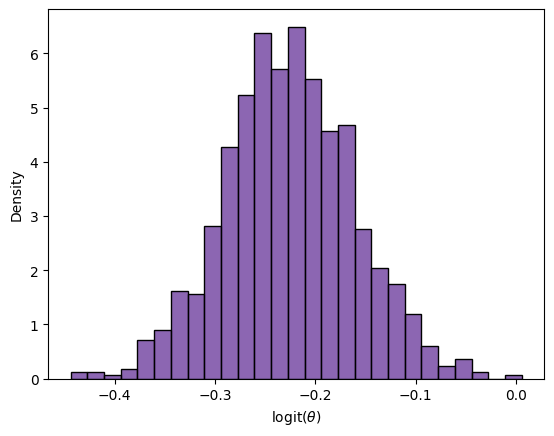

In [8]:
LogitPosteriorSample = logit(PosteriorSample)

sns.histplot(LogitPosteriorSample, color='rebeccapurple', stat='density')
_ = plt.xlabel(r'logit$(\theta)$')

In [9]:
LowLogitInterval = LogitPosteriorSample.mean() - 2 * LogitPosteriorSample.std()
UppLogitInterval = LogitPosteriorSample.mean() + 2 * LogitPosteriorSample.std()

expit(LowLogitInterval).round(3), expit(UppLogitInterval).round(3)

(0.412, 0.476)

### Cells production of protein

Assume that a particular population of cells can be in one of three states of protein production: A, B and C, corresponding to low, mid and high production, respectively. If the population is in the state A, we expect that 20% of cells are producing the protein, if it is in the state B we expect 50% and if it is in state C we expect 70%

We take a random sample of 20 cells and verify if each one of them is in production of the protein (the result of the equipment is 1 if the cell is in production and 0 if not). In this sample, we found that 12 cells were in production and the rest were not. What is the probability that the population is in each one of the states?

The next cells show two ways to find the answer to the question.

In [10]:
theta_A = 0.2
theta_B = 0.5
theta_C = 0.7

print(f"Prob. A: {theta_A**12 * (1-theta_A)**8 / (theta_A**12 * (1-theta_A)**8 + theta_B**12 * (1-theta_B)**8 + theta_C**12 * (1-theta_C)**8):.4f}")
print(f"Prob. B: {theta_B**12 * (1-theta_B)**8 / (theta_A**12 * (1-theta_A)**8 + theta_B**12 * (1-theta_B)**8 + theta_C**12 * (1-theta_C)**8):.4f}")
print(f"Prob. C: {theta_C**12 * (1-theta_C)**8 / (theta_A**12 * (1-theta_A)**8 + theta_B**12 * (1-theta_B)**8 + theta_C**12 * (1-theta_C)**8):.4f}")

Prob. A: 0.0004
Prob. B: 0.5120
Prob. C: 0.4876


In [11]:
from scipy.stats import binom

p_A = binom.pmf(12, 20, theta_A)
p_B = binom.pmf(12, 20, theta_B)
p_C = binom.pmf(12, 20, theta_C)

print(f"Prob. A: {p_A/(p_A+p_B+p_C):.4f}")
print(f"Prob. B: {p_B/(p_A+p_B+p_C):.4f}")
print(f"Prob. C: {p_C/(p_A+p_B+p_C):.4f}")

Prob. A: 0.0004
Prob. B: 0.5120
Prob. C: 0.4876


## Predictive distributions

In many cases we more interested in the behavior of future observations of the phenomenon than on some vector of parameters $\theta$. Usually, in frequentist statistics we solve this problem using a punctual estimator of $\theta$ based on the observed sample, $\hat{\theta}$, who is later plug in $p(Y|\theta)$, that is, we use $p(Y|\hat\theta)$ to predict the behavior of future observations.

In Bayesian statistics the problem is solved marginalizing the joint distribution of $\theta$ and $Y$

- Prior predictive distribution: 

$$p(Y)=\int_\Theta p(Y|\theta)p(\theta)d\theta$$

Once we obtain a sample $\mathbf{Y}$ it induced a joint distribution for $Y$ and $\theta$ conditional on the sample,

$$
\begin{aligned}
p(Y,\theta|\mathbf{Y}) & = \frac{p(Y,\theta,\mathbf{Y})}{p(\mathbf{Y})} \\
& = p(Y|\theta,\mathbf{Y})\frac{p(\theta,\mathbf{Y})}{p(\mathbf{Y})} \\
& = p(Y|\theta)p(\theta|\mathbf{Y})
\end{aligned}
$$

- Posterior predictive distribution:

$$
p(Y|\mathbf{Y})=\int_\Theta p(Y|\theta)p(\theta|\mathbf{Y})d\theta
$$

### Rule of succession

Consider the Beta-Binomial model, and the prior $\theta\sim\textsf{Beta}(1,1)$, thus the posterior distribution of $\theta$ is given by

$$\theta|Y\sim \textsf{Beta}(Y+1, n-Y+1).$$ 

Moreover, remember that if $\theta$ is a random variable with a distribution $\textsf{Beta}(\alpha,\beta)$, then

$$\mathbb{E}(\theta)=\frac{\alpha}{\alpha+\beta},$$

so

$$\mathbb{E}(\theta|Y)=\frac{Y+1}{n+2}.$$

Assume that we want to know the probability that a new Bernoulli observation $\tilde{Y}$ takes the value of 1, that is $\mathbb{P}(\tilde{Y}=1|Y)$.

$$
\begin{aligned}
\mathbb{P}(\tilde{Y}=1|Y) & = \int_0^1 \mathbb{P}(\tilde{Y}=1|\theta)p(\theta|Y)d\theta \\
& = \int_0^1\theta p(\theta|Y)d\theta \\
& = \mathbb{E}(\theta|Y) \\
& = \frac{Y+1}{n+2}.
\end{aligned}
$$

If, for example, we have made $n$ times a Bernoulli experiment without any success ($Y=0$), the probability of having success the next time is $1/(n+2)$, while the probability of success estimated with classic probability is $0/n=0$.

## Determining the hyperparameters in the Beta-Binomial model

One of the challenges to solve when we use Bayesian statistics is determine the parameters of the prior distribution, which are called hyperparameters. One way to solve this problem is by interpreting the hyperparameters, and then determine the most appropriate values for them.

For example, consider the model Beta-Binomial, in which the ñikelihood is given by 

$$p(Y|\theta)\propto \theta^a(1-\theta)^b,$$

where $a$ is the numer of successes and $b$ is number of fails.

On the other hand, the prior distribution is given by

$$p(\theta)\propto \theta^{\alpha-1}(1-\theta)^{\beta-1}.$$

Comparing these two expressions, we conclude that $\alpha-1$ is interpreted as the number of successes *a piori* and $\beta-1$ as the number of fails *a priori*.

Therefore, if we haven't made any experiment previously, we can set $\alpha=1$ and $\beta=1$. This would mean that $\theta\sim\textsf{Uniforme}(0,1)$, which coincides with Laplace's principle of indifference.

## Normal convergence of the Beta-Binomial model

We know that the Beta-Binomial model satisfies that

$$\theta|Y\sim\textsf{Beta}(\alpha+Y, \beta+n-Y).$$

Moreover, remember that if $\theta$ is a random variable with distribution $\textsf{Beta}(\alpha,\beta)$, then

$$\mathbb{E}(\theta)=\frac{\alpha}{\alpha+\beta}$$

and

$$\mathbb{V}(\theta)=\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}.$$

Thus, we have that

$$\mathbb{E}(\theta|Y)=\frac{\alpha+Y}{\alpha+\beta+n}$$

and

$$\mathbb{V}(\theta|Y)=\frac{(\alpha+Y)(\beta+n-Y)}{(\alpha+\beta+n)^2(\alpha+\beta+n+1)}.$$

Note that when $n\to\infty$, then $Y\to\infty$ and $n-Y\to\infty$, always that $\theta\in(0,1)$. Therefore when $n\to\infty$ the value of the hyperparameters are negligible, and

$$\mathbb{E}(\theta|Y)\approx \frac{Y}{n}\equiv \bar{Y}$$

and

$$\mathbb{V}(\theta|Y)\approx \frac{1}{n}\frac{Y}{n}\left(1-\frac{Y}{n}\right)\equiv \frac{1}{n}\bar{Y}(1-\bar{Y}).$$

On the other hand, by central limit theorem and Slutsky's theorem, we know that

$$\left(\sqrt{n}\frac{\bar{Y}-\theta}{\sqrt{\bar{Y}(1-\bar{Y})}}\Big|\theta\right)\xrightarrow[n\to\infty]{L}\textsf{Normal}(0,1).$$

Analogously, it is satisfied that

$$\left(\frac{\theta-\mathbb{E}(\theta|Y)}{\sqrt{\mathbb{V}(\theta|Y)}}\Big|Y\right)\xrightarrow[n\to\infty]{L}\textsf{Normal}(0,1).$$

That is, the posterior distribution converges to a normal random variable.

## Inference of a fair or a biased coin

```{note}
This example was taken from the notes of Arturo Erdely
```

Consider a box with two coins: one fair and one biased. Assume that the biased cooin is built in such way that there is a probability of 3/4 of showing "head". One person takes one the coins (not necessarily at random) and starts flipping it.

In this case, we can define the measurable space as $\Omega=\{\text{``The coin shows head''}, \text{``The coin shows tail''}\}$ and take as the sigma-algebra the power set of $\Omega$, $\mathcal{P}(\Omega)$. In this space, we define the random variable

$$
Y(\omega)=
\begin{cases}
1 & \text{if }\omega=\text{``The coin shows head''},\\ 
0 & \text{if }\omega=\text{``The coin shows tail''}.
\end{cases}
$$

Implicitly, we are not considering all other possible results, like teh case where the coin lands vertically, that we cannot determine the result, etc.

Thus, our parametric space is $\Theta=\left\lbrace\frac{3}{4}, \frac{1}{2}\right\rbrace$, our sample space is $\mathcal{Y}=\{0,1\}$.

We proceed now to calculate all the distributions presented in the Bayesian framework, beginning with the distributions that can be stablished prior to having access to a sample.

### Prior distribution

$\mathbb{P}\left(\theta=\frac{3}{4}\right)=\alpha$, $\mathbb{P}\left(\theta=\frac{1}{2}\right)=1-\alpha$, with $\alpha\in(0,1)$. This prior distribution can be written in one line as

$$p(\theta)=\alpha 1_{\{3/4\}}(\theta)+(1-\alpha)1_{\{1/2\}}(\theta).$$

Note that it depends on the hyperparameter $\alpha$ which is interpreted as the probability of choosing the biased coin. Note also, that we do not allow it to take the extreme valus of 0 or 1, in such cases we would know without uncertainty what coin was the chosen one, also if $\alpha=0$ or $\alpha=1$ we would face problems when we want to calculate some distributions.

### Likelihood

We have the random variable $Y|\theta\sim\textsf{Bernoulli}(\theta)$, thus the likelihood of our model is

$$p(Y|\theta)=\theta^Y(1-\theta)^{1-Y}1_{\{0,1\}}(Y).$$

### Prior predictive distribution

$$
\begin{align*}
p(Y) &=\sum_{\theta\in\Theta}p(Y|\theta)p(\theta) \\
&=\alpha\left(\frac{3}{4}\right)^Y\left(\frac{1}{4}\right)^{1-Y}1_{\{0,1\}}(Y)+(1-\alpha)\left(\frac{1}{2}\right)1_{\{0,1\}}(Y) \\
&= \alpha\left\lbrack\left(\frac{3}{4}-\frac{1}{2}\right)1_{\{1\}}(Y)+\left(\frac{1}{4}-\frac{1}{2}\right)1_{\{0\}}(Y)\right\rbrack+\frac{1}{2}1_{\{0,1\}}(Y) \\
&= \frac{\alpha}{4}\left\lbrack 1_{\{1\}}(Y)-1_{\{0\}}(Y)\right\rbrack+\frac{1}{2}1_{\{0,1\}}(Y).
\end{align*}
$$

That is,

$$p_Y(1)=\frac{1}{2}+\frac{\alpha}{4},\quad p_Y(0)=\frac{1}{2}-\frac{\alpha}{4}.$$

### Likelihood of the sample

Let be $Y_1,\ldots,Y_n|\theta\overset{iid}{\sim}\textsf{Bernoulli}(\theta)$, then

$$
\begin{align*}
p(\mathbf{Y}|\theta) &= \theta^{\sum_{i=1}^n y_i}(1-\theta)^{n-\sum_{i=1}^n y_i}\prod_{i=1}^n 1_{\{0,1\}}(y_i) \\
& = \theta^{\sum_{i=1}^n y_i}(1-\theta)^{n-\sum_{i=1}^n y_i}g(\mathbf{y}).
\end{align*}
$$

### Evidence

$$
\begin{align*}
p(\mathbf{Y}) &= \sum_{\theta\in\Theta}p(\mathbf{Y}|\theta)p(\theta)\\
&= \alpha\left(\frac{3}{4}\right)^{\sum_{i=1}^n y_i}\left(\frac{1}{4}\right)^{n-\sum_{i=1}^n y_i}g(\mathbf{y})+(1-\alpha)\left(\frac{1}{2}\right)^n g(\mathbf{y})\\\\
&= \left\lbrack\alpha \frac{3^{\sum_{i=1}^n y_i}}{4^n}+(1-\alpha)\frac{1}{2^n}\right\rbrack g(\mathbf{y}).
\end{align*}
$$

### Posterior distribution

Now that we know the likelihood evaluated in the sample, the prior and the evidence, we can calculate the posterior distribution of $\theta$.

$$
\begin{align*}
p(\theta|\mathbf{Y}) &= \frac{p(\mathbf{Y}|\theta)p(\theta)}{p(\mathbf{Y})} \\\\
&= \frac{\theta^{\sum_{i=1}^n y_i}(1-\theta)^{n-\sum_{i=1}^n y_i}\left\lbrack\alpha 1_{\{3/4\}}(\theta)+(1-\alpha)|_{\{1/2\}}(\theta)\right\rbrack}{\alpha \frac{3^{\sum_{i=1}^n y_i}}{4^n}+(1-\alpha)\frac{1}{2^n}}\\\\
&= \frac{[2(1-\theta)]^n\left(\frac{\theta}{1-\theta}\right)^{\sum_{i=1}^n y_i}\left\lbrack\alpha 1_{\{3/4\}}(\theta)+(1-\alpha) |_{\{1/2\}}(\theta)\right\rbrack}{1-\alpha+\alpha\left(\frac{3^{\sum_{i=1}^n y_i}}{2^n}\right)}.
\end{align*}
$$

Let be $v=\frac{\alpha}{1-\alpha}\left(\frac{3^{\sum_{i=1}^n y_i}}{2^n}\right)$, then

$$p(\theta|\mathbf{Y})=\frac{[2(1-\theta)]^n\left(\frac{\theta}{1-\theta}\right)^{\sum_{i=1}^n y_i}\left\lbrack\alpha 1_{\{3/4\}}(\theta)+(1-\alpha)1_{\{1/2\}}(\theta)\right\rbrack}{(1-\alpha)(1+v)},$$

that is 

$$p_{\theta|\mathbf{Y}}(1/2|\mathbf{y})=\frac{1}{1+v}$$

and

$$p_{\theta|\mathbf{Y}}(3/4|\mathbf{y})=1-\frac{1}{1+v}=\frac{v}{1+v}=\frac{1}{1+v^{-1}}.$$

### Posterior predictive distribution

$$
\begin{align*}
p(Y|\mathbf{Y})&=\sum_{\theta\in\Theta}p(Y|\theta)p(\theta|\mathbf{Y})\\\\
&=\left\lbrack\frac{1}{2}\left(\frac{1}{v+1}\right)+\frac{3^y}{4}\left(\frac{1}{v^{-1}+1}\right)\right\rbrack 1_{\{0,1\}}(y)\\\\
&=\left\lbrack\frac{2}{4(v+1)}+\frac{3^yv}{4(v+1)}\right\rbrack 1_{\{0,1\}}(y)\\\\
&=\frac{3^yv+2}{4(v+1)} 1_{\{0,1\}}(y),
\end{align*}
$$

that is

$$p_{Y|\mathbf{Y}}(1|\mathbf{y})=\frac{3v+2}{4(v+1)},\quad p_{Y|\mathbf{Y}}(0|\mathbf{y})=\frac{v+2}{4(v+1)}$$

```{admonition} Likelihood and likelihood of the sample
:class: tip
In this book I make distinction between the likelihood and the likelihood of the sample. However, this is not the rule but the exception, most of the Bayesian literature called both functions simply as likelihood. I have seen that students that face for the first time Bayesian statistics can be confused about which likelihood they should use when this distinction is not done. I don't complain them, the first time I was confused as well.
```

## There is no free lunch

When we make inference using frequentist statistic the procedures are usually justified by an asymptotic analysis of the method. As a consequence, it's performance for small samples is questionable. Meanwhile, the Bayesian statistic is valid for any sample size. This doesn't mean that having more data is useless, but the opposite. The price to pay for this power is the dependence on the prior information. A non-reliable prior distribution compromises the results.

```{admonition} Historical discussion about the prior
:class: tip
Historically, some detractors of the Bayesian statistics have argumented about the arbitrariness of the prior distribution. It is true that prior distributions can be flexible enough to code different types of information. Then, if the prior can be anything, isn't it possible to obtain any answer that you want? The answer is yes.

However, the likelihood is also a subjective model that is impose by the agent, and eventually with a large sample the effect of the prior distribution would be eventually buried. Thus, if your objective is to modify the results is easier modifying the likelihood.
```